In [ ]:
import numpy as np
import torch
import qtorch
from qtorch.quant import posit_quantize


In [ ]:
a = np.arange(-20,20,2.5)
a = torch.tensor(a, dtype=torch.float)
#a = torch.rand(10)
b = posit_quantize(a,nsize=4,es=1)

print (a) 
print (b)


In [ ]:
import matplotlib.pyplot as plt
plt.plot (a,a, color="green")
plt.plot (a,b, color="red")

In [ ]:
plt.plot (a,np.abs(a-b), color="blue")

Using /home/minh/.cache/torch_extensions as PyTorch extensions root...
Emitting ninja build file /home/minh/.cache/torch_extensions/quant_cpu/build.ninja...
Building extension module quant_cpu...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module quant_cpu...
Using /home/minh/.cache/torch_extensions as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/minh/.cache/torch_extensions/quant_cuda/build.ninja...
Building extension module quant_cuda...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module quant_cuda...


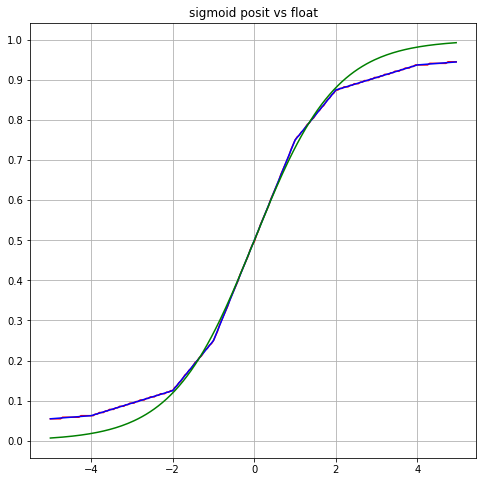

In [1]:
#test sigmoid
import numpy as np
import matplotlib.pyplot as plt
from qtorch.quant import posit_quantize, posit_sigmoid, posit_tanh, posit_tanh_enhanced,posit_tanh_enhanced2
plt.rcParams["figure.figsize"]=8,8
import torch

def sigmoid(x) : 
    return np.exp(x)/(np.exp(x)+1)

from qtorch.quant import posit_sigmoid
input = np.arange(-5,5,0.05)
input_tensor = torch.tensor(input, dtype=torch.float)
out_8 = posit_sigmoid(input_tensor,nsize=8,es=0)
out_16 = posit_sigmoid(input_tensor,nsize=16,es=0)
plt.plot(input, out_8.numpy().flatten(),color='red')
plt.plot(input, out_16.numpy().flatten(),color='blue')
plt.plot(input,sigmoid(input),color='green')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.title('sigmoid posit vs float')
plt.show()


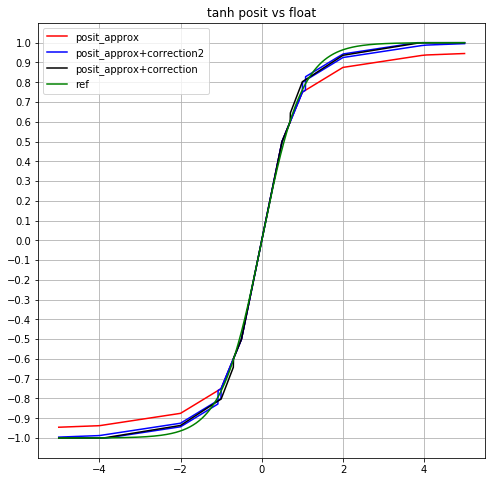

In [2]:

input = np.arange(-5,5,0.005)
input_tensor = torch.tensor(input, dtype=torch.float)
def tanh(x) : 
    return np.exp(x)/(np.exp(x)+1)
def correction(element):
    if (element>0.75):
        return min(element+0.05, 1)
    elif (element<-0.75):
        return max(element-0.05, -1)
    else : 
        return element

out_8 = posit_tanh(input_tensor,nsize=8,es=0)
out_16 = posit_tanh(input_tensor,nsize=16,es=0)
corrected_tanh = np.fromiter(map(correction, out_16.numpy().flatten()), dtype=float)

out_16_enhanced = posit_tanh_enhanced(input_tensor,nsize=16,es=0)
out_16_enhanced2 = posit_tanh_enhanced2(input_tensor,nsize=16,es=0)

plt.plot(input, out_16.numpy().flatten(),color='red',label = "posit_approx")
plt.plot(input, corrected_tanh,color='blue')
#plt.plot(input, out_8.numpy().flatten() * 1.05,color='blue')
plt.plot(input, out_16_enhanced2,color='blue', label = "posit_approx+correction2")
plt.plot(input, out_16_enhanced,color='black', label = "posit_approx+correction")
plt.plot(input,np.tanh(input),color='green', label="ref")
plt.title('tanh posit vs float')
plt.yticks(np.arange(-1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

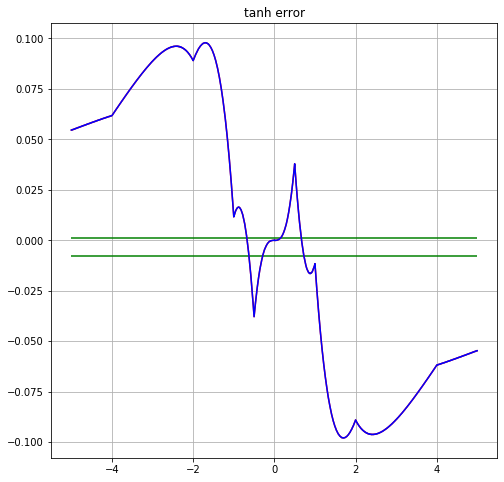

In [3]:
plt.plot(input, out_16.numpy().flatten() - np.tanh(input),color='red')
plt.plot(input, out_16.numpy().flatten() - np.tanh(input),color='blue')
plt.hlines([-2/255.0, 2/255.0], min(input), max(input),color = 'green')
plt.title('tanh error')
plt.grid()
plt.show()

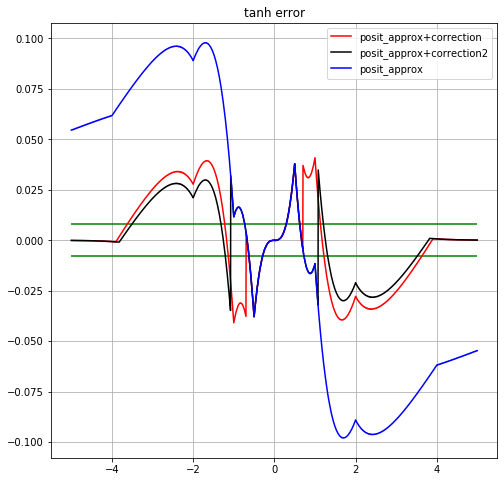

In [5]:
def correction(element):
    if (element>0.6):
        return min(element*1.07, 1)
    elif (element<-0.6):
        return max(element*1.07, -1)
    else : 
        return element
def correction2(element):
    if (element>0.76):
        return min(element+0.068, 1)
    elif (element<-0.76):
        return max(element-0.068,-1)
    else : 
        return element
corrected_tanh = np.fromiter(map(correction, out_16.numpy().flatten()), dtype=float)
corrected_tanh2 = np.fromiter(map(correction2, out_16.numpy().flatten()), dtype=float)
plt.plot(input, out_16_enhanced - np.tanh(input) ,color='red',label = "posit_approx+correction")
plt.plot(input, out_16_enhanced2 - np.tanh(input) ,color='black',label = "posit_approx+correction2")
plt.plot(input, out_16.numpy().flatten() - np.tanh(input),color='blue',label = "posit_approx")
plt.hlines([-2/255.0, 2/255.0], min(input), max(input),color = 'green')
plt.title('tanh error')
plt.legend()
plt.grid()
plt.show()